<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto práctico del proyecto, correspondiente a la materia Aprendizaje Automático Supervisado. El objetivo consiste en profundizar en la aplicación de métodos de aprendizaje supervisado aprendidos en el curso, así como también en métodos de _ensemble learning_. Esto, siempre a través de experimentos reproducibles y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

A los fines de este práctico, consideraremos el problema original de nuestro proyecto, el cual consiste en un problema de clasificación múltiple con datos etiquetados. Nuevamente, al igual que en el práctico anterior, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd

import mlflow.sklearn

# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from ml.visualization import plot_confusion_matrix, plot_learning_curve
import datetime
import mlflow
np.random.seed(0)  # Para mayor determinismo

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos, prácticamente iguales a los del práctico anterior.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.
En esta etapa, nuevamente, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, la que crearon de aparatos tecnológicos.

#### 3. Análisis del Balance de Clases

¿Cómo luce el balance de clases? ¿Tomarán alguna decisión al respecto?

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría.

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para el dataset que consideren más apropiado**, en base a los resultados obtenidos en el práctico anterior.

#### 6. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización, considerando los nuevos modelos propuestos?

Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 7. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean pertinente.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Finalmente, **combinar los modelos en un clasificador por votos** (pueden implementar VotingClassifier, del módulo de ensemble).

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + Accuracy o exactitud
    + Reporte de clasificación
    + Confusion matrix o matriz de confusión (graficar como heatmap)
    + Curva ROC y área bajo la curva (AUC).
- Es apropiado utilizar la métrica **acuracy o exactitud** como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán sintetizar las principales conclusiones de éste y el anterior práctico en un PPT (dataset utilizado para entrenar el modelo, modelo más apropiado, selección de hiperparámetros y métricas calculadas).

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [3]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields.head(5)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [5]:
import clean

clean_ds = clean.clean(_ds)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Columnas eliminadas: edjefe, edjefa, dependency, meaneduc, rez_esc, hhsize, r4t1, r4t2, r4t3,r4m3, r4h3, hogar_total
Cantidad de familias sin caracteristicas comunes:  19
Cantidad de familias sin caracteristicas comunes:  4


D:\Diplo\workspace\DiploDatos2019\ProyectoPobrezaCostaRica\clean.py:147: FutureWarning: `item` has been deprecated and will be removed in a future version
  x['edu_jefe'] = (_ds.loc[(_ds['parentesco1']==1) & (_ds['idhogar']==x['idhogar']), 'escolari'].item())**2


Total Features:  2 objetos + 123 numerical = 125 features


In [90]:
clean_ds.head()

,Id,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,Target,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight
0,ID_279628684,190000.000000,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,1,1.0,12.154779,0.333333,63333.333333,1849,1,0.0,0.333333,0.00,1.00
1,ID_f29eb3ddd,135000.000000,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,4,4.0,11.813030,0.250000,33750.000000,4489,4,0.0,0.500000,0.00,1.00
2,ID_68de51c94,328862.222222,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,0,0.0,12.703394,0.250000,41107.777778,8464,4,0.0,0.250000,1.00,0.00
3,ID_d671db89c,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,4,16.0,12.100712,0.600000,36000.000000,289,16,0.5,0.800000,0.25,0.25
4,ID_d56d6f5f5,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,4,16.0,12.100712,0.600000,36000.000000,1369,16,0.5,0.800000,0.25,0.25


In [9]:
clean_ds['bedrooms_to_rooms'] = clean_ds['bedrooms']/clean_ds['rooms']
clean_ds['rent_to_rooms'] = clean_ds['monthly_rent']/clean_ds['rooms']
clean_ds['SQBage'] = clean_ds['age'] ** 2
clean_ds['SQBhogar_total'] = (clean_ds['hogar_nin'] + clean_ds['hogar_mayor'] +clean_ds['hogar_adul']) ** 2
clean_ds['child_dependency'] = clean_ds['hogar_nin'] / (clean_ds['hogar_nin'] + clean_ds['hogar_mayor']+clean_ds['hogar_adul']) 
#clean_ds['SQBworker'] = clean_ds['hogar_adul'] ** 2  tenemos 800 casos en que los jefes de hogar son mayores de 60
clean_ds['rooms_per_person'] = (clean_ds['hogar_nin'] + clean_ds['hogar_mayor'] +clean_ds['hogar_adul'])  / (clean_ds['rooms'])
clean_ds['female_weight'] = ((clean_ds['r4m1'] + clean_ds['r4m2'])/clean_ds['tamhog'])**2
clean_ds['male_weight'] = ((clean_ds['r4h1'] + clean_ds['r4h2'])/clean_ds['tamhog'])**2

In [12]:
clean_ds.head()

,Id,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,Target,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight
0,ID_279628684,190000.000000,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,1,1.0,12.154779,0.333333,63333.333333,1849,1,0.0,0.333333,0.00,1.00
1,ID_f29eb3ddd,135000.000000,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,4,4.0,11.813030,0.250000,33750.000000,4489,4,0.0,0.500000,0.00,1.00
2,ID_68de51c94,328862.222222,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,0,0.0,12.703394,0.250000,41107.777778,8464,4,0.0,0.250000,1.00,0.00
3,ID_d671db89c,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,4,16.0,12.100712,0.600000,36000.000000,289,16,0.5,0.800000,0.25,0.25
4,ID_d56d6f5f5,180000.000000,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,4,16.0,12.100712,0.600000,36000.000000,1369,16,0.5,0.800000,0.25,0.25


### 3. Análisis de Balance de Clases

Se realizaron tres tipos de balanceo:
- RandomOverSampler: replica aleatoriamente los ejemplos de clases minoritarias. Se sabe que el sobremuestreo aleatorio aumenta la probabilidad de que ocurra un overfitting. 
- SMOTE: Primero, encuentra los n vecinos más cercanos en la clase minoritaria para cada una de las muestras de la clase. Luego dibuja una línea entre los vecinos y genera puntos aleatorios en las líneas. La imagen muestra  los 5 vecinos más cercanos a los puntos de muestra. luego dibuja una línea a cada uno de ellos. Luego crea muestras en las líneas con clase igual a la clase minoritaria.
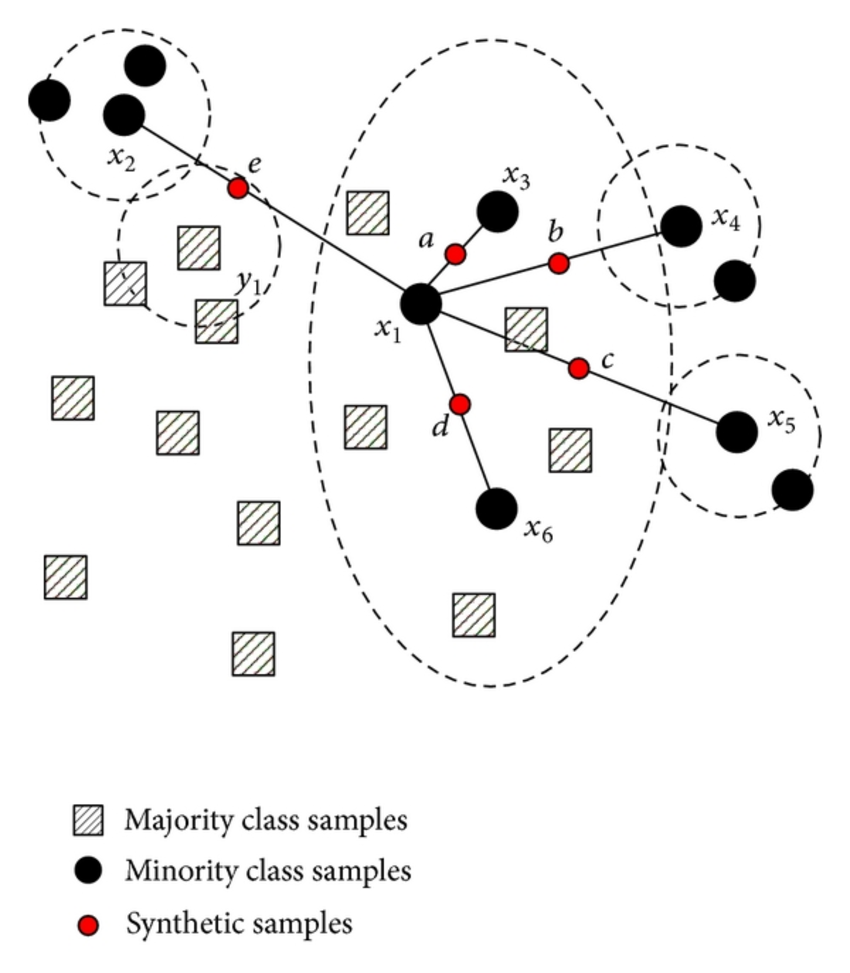
- ADASYN: Es una versión mejorada de Smote. Lo que hace es lo mismo que SMOTE solo con una pequeña mejora. Después de crear esas muestras, agrega valores aleatorios pequeños a los puntos, lo que lo hace más realista. En otras palabras, en lugar de que toda la muestra esté correlacionada linealmente con el padre, tienen un poco más de variación, es decir, están un poco dispersos.

El dataset presenta un importante desbalanceo de clases para la clase 1,2 y 3. Por lo que hemos elegido ADASYN como método de oversampling.

#### Balanceo de clases jefes de hogar

In [8]:
clean_ds[clean_ds['parentesco1']==1].groupby('Target')['Id'].count()

Target
1     222
2     442
3     355
4    1942
Name: Id, dtype: int64

In [50]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

ros = RandomOverSampler(random_state=0)
X_resampled_random_jef, y_resampled_random_jef = ros.fit_resample(clean_ds[clean_ds['parentesco1']==1].drop(['Id','idhogar','Target'], axis=1), clean_ds[clean_ds['parentesco1']==1]['Target'])
X_resampled_random_jef = pd.DataFrame(X_resampled_random_jef)
X_resampled_random_ind.columns = clean_ds.drop(['Target'], axis=1).columns
y_resampled_random_jef = pd.DataFrame(y_resampled_random_jef)
y_resampled_random_jef.columns = ['Target']
data_oversampled_random_jef = pd.concat([pd.DataFrame(X_resampled_random_jef), pd.DataFrame(y_resampled_random_jef)], axis=1)



X_resampled_smote_jef, y_resampled_smote_jef = SMOTE(random_state=42).fit_resample(clean_ds[clean_ds['parentesco1']==1].drop(['Id','idhogar','Target'], axis=1), clean_ds[clean_ds['parentesco1']==1]['Target'])
print(sorted(Counter(y_resampled_smote_jef).items()))
data_oversampled_smote_jef = pd.concat([pd.DataFrame(X_resampled_smote_jef), pd.DataFrame(y_resampled_smote_jef)], axis=1)
data_oversampled_smote_jef.columns = clean_ds.drop(['Id','idhogar','Target'], axis=1).columns + ['Target']



X_resampled_adasyn_jef, y_resampled_adasyn_jef = ADASYN(random_state=42).fit_resample(clean_ds[clean_ds['parentesco1']==1].drop(['Id','idhogar','Target'], axis=1), clean_ds[clean_ds['parentesco1']==1]['Target'])
print(sorted(Counter(y_resampled_adasyn_jef).items()))
data_oversampled_adasyn_jef = pd.concat([pd.DataFrame(X_resampled_adasyn_jef), pd.DataFrame(y_resampled_adasyn_jef)], axis=1)
data_oversampled_adasyn_jef.columns = clean_ds.drop(['Id','idhogar','Target'], axis=1).columns + ['Target']


[(1, 1942), (2, 1942), (3, 1942), (4, 1942)]
[(1, 1942), (2, 1942), (3, 1942), (4, 1942)]
[(1, 1962), (2, 1900), (3, 1891), (4, 1942)]


In [14]:
data_oversampled_random_jef.describe()

,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,Target,tech_individuo,tech_hogar,monthly_rent_log,bedrooms_to_rooms,rent_to_rooms,SQBage,SQBhogar_total,child_dependency,rooms_per_person,female_weight,male_weight
count,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.00000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.00000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.00000,7768.0,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.0,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.0,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000,7768.000000
mean,122197.785031,0.044156,4.519696,0.025747,0.990345,0.933702,0.133368,0.183059,0.360711,1.229918,0.379506,1.429712,3.389804,3.533986,6.682415,0.485453,0.098610,0.226442,0.01622,0.156153,0.013131,0.003090,0.000901,0.598738,0.286818,0.000257,0.00206,0.024331,0.087796,0.980304,0.014418,0.004377,0.000901,0.570417,0.958677,0.036174,0.005149,0.886843,0.000644,0.004377,0.108136,0.008496,0.180484,0.787075,0.020855,0.003090,0.009912,0.427781,0.483393,0.078913,0.837667,0.037461,0.122297,0.00206,0.0,0.000515,0.159243,0.381179,0.459578,0.197734,0.338182,0.464083,0.149588,0.324279,0.526133,0.097966,0.572606,0.427394,0.0,0.193100,0.368821,0.051622,0.162204,0.092302,0.131952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.245237,2.144567,0.332261,0.076468,0.225669,0.315525,0.177781,0.095520,0.006050,0.006437,0.084706,0.011715,2.469361,1.539680,0.637101,0.057544,0.165294,0.031668,0.108393,0.049434,0.211123,0.936792,2.218203,0.510556,0.095263,0.091916,0.104918,0.115345,0.082003,0.674305,0.325695,50.444258,1.336637,10.272528,11.476542,0.554533,27728.694036,2813.062436

#### Balanceo de clases individuo

In [15]:
clean_ds.groupby('Target')['Id'].count()

Target
1     755
2    1597
3    1189
4    5953
Name: Id, dtype: int64

In [80]:
ros = RandomOverSampler(random_state=0)
X_resampled_random_ind, y_resampled_random_ind = ros.fit_resample(clean_ds.drop(['Target'], axis=1), clean_ds['Target'])
print(sorted(Counter(y_resampled_random_ind).items()))
X_resampled_random_ind = pd.DataFrame(X_resampled_random_ind)
X_resampled_random_ind.columns = clean_ds.drop(['Target'], axis=1).columns
y_resampled_random_ind = pd.DataFrame(y_resampled_random_ind)
y_resampled_random_ind.columns = ['Target']
data_oversampled_random_ind = pd.concat([pd.DataFrame(X_resampled_random_ind), pd.DataFrame(y_resampled_random_ind)], axis=1)


X_resampled_smote_ind, y_resampled_smote_ind = SMOTE(random_state=42).fit_resample(clean_ds.drop(['Target','Id','idhogar'], axis=1), clean_ds['Target'])
print(sorted(Counter(y_resampled_smote_ind).items()))
data_oversampled_smote_ind = pd.concat([pd.DataFrame(X_resampled_smote_ind), pd.DataFrame(y_resampled_smote_ind)], axis=1)
data_oversampled_smote_ind.columns = clean_ds.drop(['Id','idhogar','Target'], axis=1).columns + ['Target']

X_resampled_adasyn_ind, y_resampled_adasyn_ind = ADASYN(random_state=42).fit_resample(clean_ds.drop(['Target','Id','idhogar'], axis=1), clean_ds['Target'])
print(sorted(Counter(y_resampled_adasyn_ind).items()))
data_oversampled_adasyn_ind = pd.concat([pd.DataFrame(X_resampled_adasyn_ind), pd.DataFrame(y_resampled_adasyn_ind)], axis=1)
data_oversampled_adasyn_ind.columns = clean_ds.drop(['Id','idhogar','Target'], axis=1).columns + ['Target']

[(1, 5953), (2, 5953), (3, 5953), (4, 5953)]
[(1, 5953), (2, 5953), (3, 5953), (4, 5953)]
[(1, 5996), (2, 5973), (3, 5594), (4, 5953)]


### 4. Multicolinealidad Exacta y Variables Dummies

Decisiones respecto a las variables con multicolinealidad perfecta.

In [17]:
def drop_multicollinearity(df, show=False):
    dummy_list = [['parentesco1','parentesco2', 'parentesco3', 'parentesco4', 'parentesco5',
           'parentesco6', 'parentesco7', 'parentesco8', 'parentesco9',
           'parentesco10','parentesco11','parentesco12'],
                 ['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother'],
                  ['pisomoscer','pisocemento','pisoother','pisonatur','pisonotiene','pisomadera'],
                  ['techozinc','techoentrepiso','techocane','techootro'],
                  ['abastaguadentro','abastaguafuera','abastaguano'],
                 ['public','planpri','noelec','coopele'],
                  ['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6'],
                  ['energcocinar1','energcocinar2','energcocinar3','energcocinar4'],
                  ['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6'],
                  ['epared1','epared2','epared3'],
                  ['etecho1','etecho2','etecho3'],
                  ['eviv1','eviv2','eviv3'],
                  ['male','female'],
                  ['estadocivil1','estadocivil2','estadocivil3','estadocivil4','estadocivil5','estadocivil6','estadocivil7'],
                  ['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9'],
                  ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5'],
                  ['region_central','region_chorotega','region_pacifico_central','region_brunca','region_huetar_atlantica','region_huetar_norte'],
                  ['zona_urbana','zona_rural']
                 ]

    drop_list = []
    for dummy in dummy_list:

        k = dummy[0]
        colin =  pd.DataFrame(data=df[k], columns=[k])
        colin['suma'] = df[df[dummy].columns.difference([k])].sum(axis=1)
        corr = colin.corr(method='spearman')
        if show:
            print(k)
            print(corr)
        drop_list.append(dummy[-1])
        #plt.figure(figsize = (8,5))
        #sns.heatmap(corr, annot=True,fmt="f", vmin=-1, vmax=1)
        
    return df.drop(drop_list, axis=1)

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, deberán elegir si trabajar el dataset por individuo o por hogar.

En caso de elegir hacerlo por hogar, crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [18]:
_ds_individuo = _ds
_ds_hogar = _ds[_ds['parentesco1'] == 1]
_ds_hogar.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,2,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,4


### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [55]:
# Pueden utilizar los siguientes métodos, por ejemplo:
from sklearn import preprocessing


def normalizar(df, scaler):
    fields = [
        'monthly_rent', 'hacdor', 'rooms', 'hogar_nin', 'hogar_adul',
        'qmobilephone', 'hogar_mayor', 'v18q1', 'r4h1', 'r4h2', 'r4m1', 'r4m2',
        'tamhog', 'tamviv', 'escolari', 'bedrooms', 'overcrowding', 'age',
        'tech_individuo', 'tech_hogar', 'monthly_rent_log',
        'bedrooms_to_rooms', 'rent_to_rooms', 'SQBage', 'SQBhogar_total',
        'child_dependency', 'rooms_per_person', 'female_weight', 'male_weight'
    ]
    for col in fields:
        df[col] = scaler.fit_transform(df[[col]])
    return df

### 7. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

In [72]:
def mix_divide_train_test(df):
    _ds_shuff = shuffle(df) 
    return train_test_split(_ds_shuff.drop(['Target'], axis=1), _ds_shuff['Target'], test_size=0.20, random_state=0)

In [73]:
def prepare_data(_ds):
    df_multicollinearity = drop_multicollinearity(_ds)
    X_train, X_test, y_train, y_test= mix_divide_train_test(df_multicollinearity)
    minmax = preprocessing.MinMaxScaler()
    X_train_norm = normalizar(X_train, minmax)
    X_test_norm = normalizar(X_test, minmax)
    return X_train_norm, X_test_norm, y_train, y_test, df_multicollinearity.columns

### 8. Store Results

In [74]:
def save_mlflow(model_name,model, clasification_report, model_params, extra_param_dic, accuracy_train, accuracy_test):
    experiment_name = "PobrezaCostaRica-Aprendizaje Supervisado"
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(nested=True, run_name=model_name):
        # Log model hiperparameters first
        mlflow.sklearn.log_model(model, "model")
        mlflow.log_param('model',model_name)
        mlflow.log_param('clasification_report', clasification_report)
        mlflow.log_param('model_params', model_params)
        mlflow.log_param('extra_param_dic', extra_param_dic)
        mlflow.log_metric('accuracy_train', accuracy_train)
        mlflow.log_metric('accuracy_test', accuracy_test)
        for key, values in extra_param_dic.items():
            mlflow.set_tag(key,values)
        
        
        

## II. Aplicación de Modelos de Clasificación en individuos Random oversampled

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [82]:
X_train, X_test, y_train, y_test, col= prepare_data(data_oversampled_random_ind)

### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [83]:
# Algunos kernels son: "rbf","sigmoid","poly"

model = SVC(kernel="sigmoid", random_state=0, class_weight=None)
model.fit(X_train.drop(['Id', 'idhogar'], axis=1), y_train)

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.50
Exactitud del algoritmo para conjunto de validación: 0.48
              precision    recall  f1-score   support

           1       0.50      0.59      0.54      1181
           2       0.41      0.30      0.35      1202
           3       0.39      0.41      0.40      1147
           4       0.61      0.63      0.62      1233

    accuracy                           0.48      4763
   macro avg       0.48      0.48      0.48      4763
weighted avg       0.48      0.48      0.48      4763


Accuracy: 0.4835



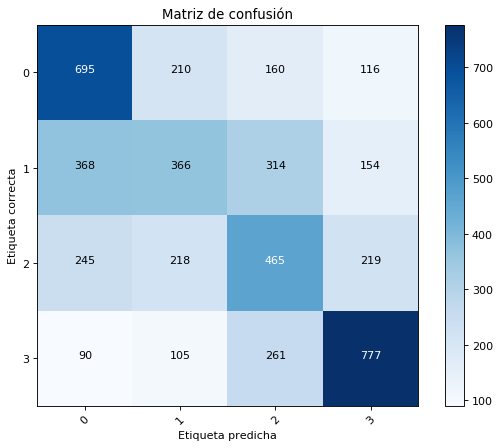

In [84]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train.drop(['Id', 'idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("SVC", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "random"
            }, accuracy_train, accuracy_test)
report = classification_report(y_test, y_pred_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[0, 1, 2, 3],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

print("================================================", end="\n\n")

### 1. Support Vector Machines con split then oversampled

In [37]:
X_train, X_test, y_train, y_test, columns = prepare_data(clean_ds)
ros = RandomOverSampler(random_state=0)
X_resampled_random_ind, y_resampled_random_ind = ros.fit_resample(
    X_train, y_train)
print(sorted(Counter(y_resampled_random_ind).items()))
data_oversampled_random_ind = pd.concat([
    pd.DataFrame(X_resampled_random_ind),
    pd.DataFrame(y_resampled_random_ind)
],
                                        axis=1)
data_oversampled_random_ind.columns = columns

X_train = data_oversampled_random_ind.drop(['Target'], axis=1)
y_train = data_oversampled_random_ind['Target']

[(1, 4785), (2, 4785), (3, 4785), (4, 4785)]


A continuación se aplicará un clasificador SVM.

In [38]:
# Algunos kernels son: "rbf","sigmoid","poly"

model = SVC(kernel="sigmoid", random_state=0, class_weight=None)
model.fit(X_train.drop(['Id', 'idhogar'], axis=1), y_train)

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.49
Exactitud del algoritmo para conjunto de validación: 0.56
              precision    recall  f1-score   support

           1       0.28      0.54      0.37       170
           2       0.37      0.34      0.36       326
           3       0.23      0.39      0.29       235
           4       0.88      0.66      0.75      1168

    accuracy                           0.56      1899
   macro avg       0.44      0.48      0.44      1899
weighted avg       0.66      0.56      0.59      1899


Accuracy: 0.5592



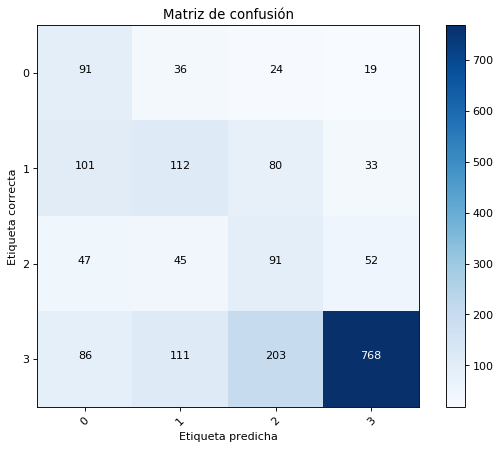

In [41]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train.drop(['Id', 'idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("SVC", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "random",
                "data-preparation":"split-oversample" 
            }, accuracy_train, accuracy_test)
report = classification_report(y_test, y_pred_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[0, 1, 2, 3],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

print("================================================", end="\n\n")

### 1. Support Vector Machines con split then oversampled  with new features

In [92]:
X_train, X_test, y_train, y_test, columns = prepare_data(clean_ds)
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(
    X_train, y_train)
print(sorted(Counter(y_resampled_random_ind).items()))

X_train = pd.DataFrame(X_train)
X_train.columns = columns.drop('Target')
y_train = pd.DataFrame(y_train)
y_train.columns = ['Target']

[('Target', 1)]


A continuación se aplicará un clasificador SVM.

In [46]:
# Algunos kernels son: "rbf","sigmoid","poly"

model = SVC(kernel="sigmoid", random_state=0, class_weight=None)
model.fit(X_train.drop(['Id', 'idhogar'], axis=1), y_train)

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.50
Exactitud del algoritmo para conjunto de validación: 0.53
              precision    recall  f1-score   support

           1       0.23      0.52      0.32       147
           2       0.32      0.32      0.32       304
           3       0.22      0.35      0.27       254
           4       0.88      0.62      0.73      1194

    accuracy                           0.53      1899
   macro avg       0.41      0.45      0.41      1899
weighted avg       0.65      0.53      0.57      1899


Accuracy: 0.5308



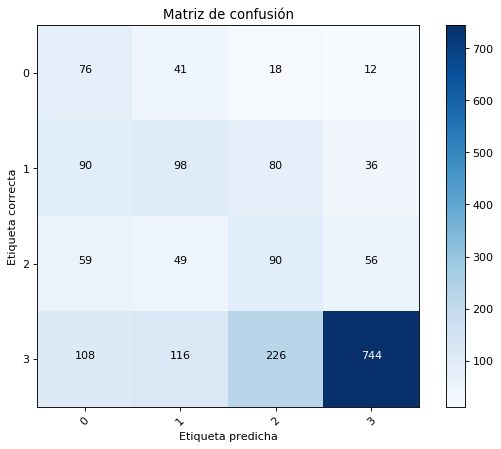

In [47]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train.drop(['Id', 'idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("SVC", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "random",
                "data-preparation":"split-oversample",
                "columns": X_train.columns
            }, accuracy_train, accuracy_test)
report = classification_report(y_test, y_pred_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[0, 1, 2, 3],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

print("================================================", end="\n\n")

###  Exhaustive Grid Search

In [93]:
param_grid = {
    'C': [1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.001, 0.0001]
}

m = SVC(random_state=0, class_weight=None)
model = GridSearchCV(m,
                     param_grid,
                     cv=5,
                     scoring='accuracy',
                     n_jobs=-1,
                     return_train_score=True)
model.fit(X_train.drop(['Id', 'idhogar'], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste", end="\n\n")

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" %
          (mean, std**2, params))

print("best results")
print(model.cv_results_)

print(
    "Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):",
    end="\n\n")
y_true, y_pred = y_test, model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

y_train, y_train_pred = y_train, model.predict(
    X_train.drop(['Id', 'idhogar'], axis=1))

save_mlflow("SVC", model,
            classification_report(y_true, y_pred, output_dict=True),
            model.best_params_, {
                "dataset": "individual",
                "sampling": "random"
            }, accuracy_score(y_train, y_train_pred),
            accuracy_score(y_true, y_pred))

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

KeyboardInterrupt: 

### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)

c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\soluj\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.92
              precision    recall  f1-score   support

           1       0.92      0.88      0.90       144
           2       0.88      0.85      0.86       312
           3       0.89      0.77      0.83       222
           4       0.93      0.97      0.95      1221

    accuracy                           0.92      1899
   macro avg       0.91      0.87      0.88      1899
weighted avg       0.92      0.92      0.92      1899


Accuracy: 0.9194



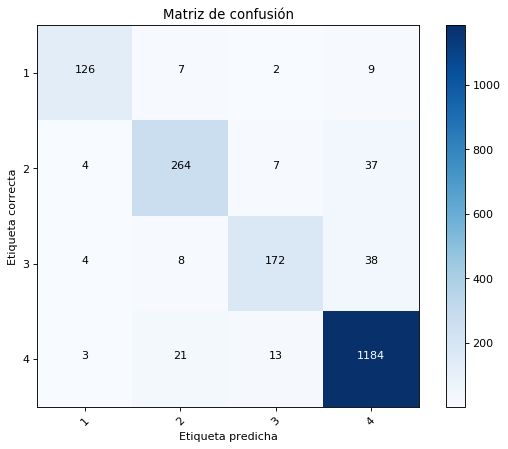

In [95]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train.drop(['Id', 'idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

save_mlflow("RandomForestClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "random"
            }, accuracy_train, accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.54
Exactitud del algoritmo para conjunto de validación: 0.45

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.93

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.38
Exactitud del algoritmo para conjunto de validación: 0.27

VotingClassifier. voting hard
[2 1 4 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.74
Exactitud del algoritmo para conjunto de validación: 0.49


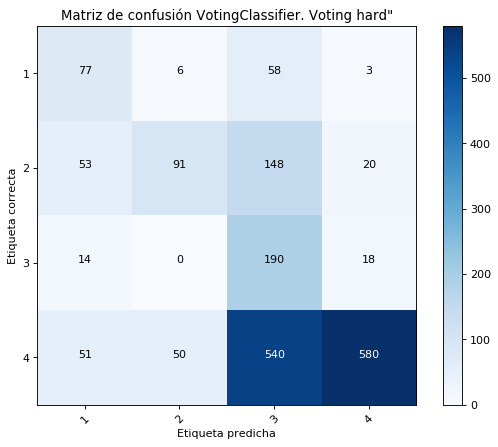


VotingClassifier. voting soft
[3 1 4 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.73
Exactitud del algoritmo para conjunto de validación: 0.40


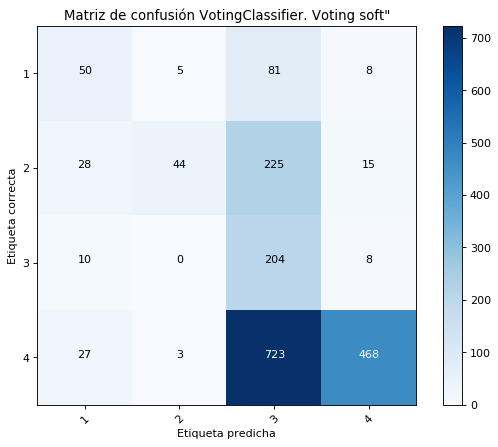


VotingClassifier. voting soft with weights
[4 1 4 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.80


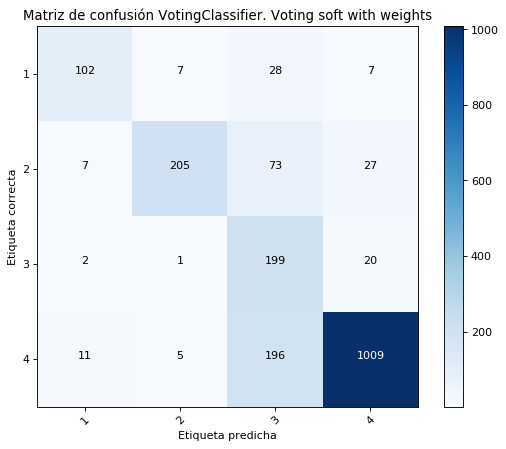

In [100]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')

clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=1, max_iter=1000)
clf1.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
y_pred_train =   clf1.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf1.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
y_pred_train =   clf2.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf2.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
y_pred_train =   clf3.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf3.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
eclf1 = eclf1.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
print(eclf1.predict(X_train.drop(['Id','idhogar'], axis=1)))
y_pred_train =   eclf1.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf1.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
save_mlflow("VotingClassifier",eclf1,None,
            None, {"dataset": "individual", "sampling":"random"},
            accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train.drop(['Id','idhogar'], axis=1)),
               eclf1.named_estimators_['lr'].predict(X_train.drop(['Id','idhogar'], axis=1)))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft', n_jobs=-1)
eclf2 = eclf2.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
print(eclf2.predict(X_train.drop(['Id','idhogar'], axis=1)))
y_pred_train =   eclf2.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf2.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf2,None,
            None, {"dataset": "individual", "sampling":"random"},
            accuracy_train, accuracy_test)


print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,3,1],
       flatten_transform=True, n_jobs=-1)
eclf3 = eclf3.fit(X_train.drop(['Id','idhogar'], axis=1), y_train)
print(eclf3.predict(X_train.drop(['Id','idhogar'], axis=1)))
y_pred_train =   eclf3.predict(X_train.drop(['Id','idhogar'], axis=1))
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf3.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf3,None,
            None, {"dataset": "individual", "sampling":"random"},
            accuracy_train, accuracy_test)


## III. Aplicación de Modelos de Clasificación en individuos SMOTE 

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [126]:
X_train, X_test, y_train, y_test, columns = prepare_data(clean_ds)

X_resampled_smote_ind, y_resampled_smote_ind = SMOTE(
    random_state=42).fit_resample(X_train.drop(['Id', 'idhogar'], axis=1),
                                  y_train)
print(sorted(Counter(y_resampled_smote_ind).items()))
X_train = pd.DataFrame(X_resampled_smote_ind)
X_train.columns = X_train.columns
y_train = pd.DataFrame(y_resampled_smote_ind)
y_train.columns = pd.Index(['Target'])


[(1, 4782), (2, 4782), (3, 4782), (4, 4782)]


### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [127]:
# Algunos kernels son: "rbf","sigmoid","poly"
from sklearn.svm import SVC
model = SVC(kernel="sigmoid", random_state=0, class_weight=None, gamma='auto')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.53
Exactitud del algoritmo para conjunto de validación: 0.54
              precision    recall  f1-score   support

           1       0.31      0.53      0.40       171
           2       0.35      0.30      0.33       322
           3       0.20      0.39      0.26       235
           4       0.86      0.64      0.73      1171

    accuracy                           0.54      1899
   macro avg       0.43      0.47      0.43      1899
weighted avg       0.64      0.54      0.57      1899


Accuracy: 0.5408



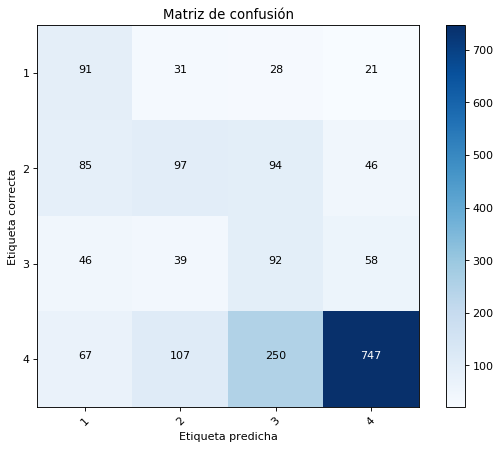

In [129]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

report = classification_report(y_test, y_pred_test)

save_mlflow("SVC", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "smote"
            }, accuracy_train, accuracy_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [130]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.82
              precision    recall  f1-score   support

           1       0.75      0.75      0.75       171
           2       0.71      0.75      0.73       322
           3       0.61      0.69      0.65       235
           4       0.92      0.88      0.90      1171

    accuracy                           0.82      1899
   macro avg       0.75      0.77      0.76      1899
weighted avg       0.83      0.82      0.82      1899


Accuracy: 0.8220



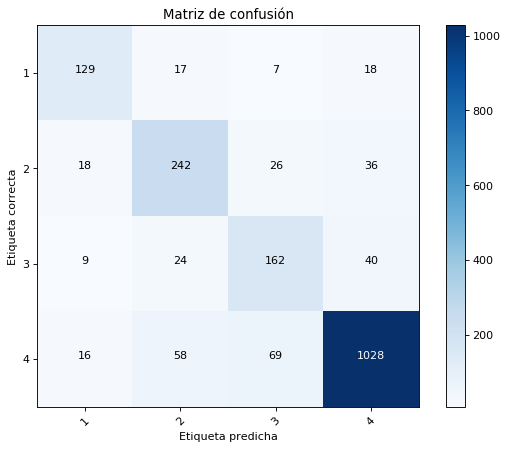

In [136]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("RandomForestClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "smote"
            }, accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [139]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.70
Exactitud del algoritmo para conjunto de validación: 0.52
              precision    recall  f1-score   support

           1       0.37      0.40      0.38       171
           2       0.33      0.21      0.26       322
           3       0.19      0.55      0.29       235
           4       0.85      0.61      0.71      1171

    accuracy                           0.52      1899
   macro avg       0.44      0.44      0.41      1899
weighted avg       0.64      0.52      0.55      1899


Accuracy: 0.5155



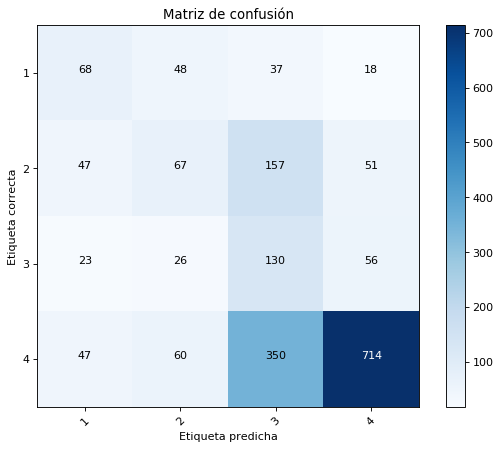

In [141]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test.drop(['Id', 'idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("MLPClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "individual",
                "sampling": "smote"
            }, accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

In [ ]:
# Se calcula la exactitud para ambos conjuntos, train y test:



### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.57
Exactitud del algoritmo para conjunto de validación: 0.53

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.90

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.40
Exactitud del algoritmo para conjunto de validación: 0.30

VotingClassifier. voting hard
[4 4 4 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.74
Exactitud del algoritmo para conjunto de validación: 0.60


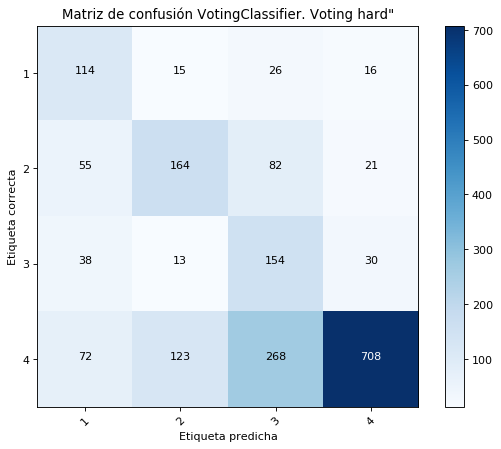


VotingClassifier. voting soft
[4 4 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.70
Exactitud del algoritmo para conjunto de validación: 0.45


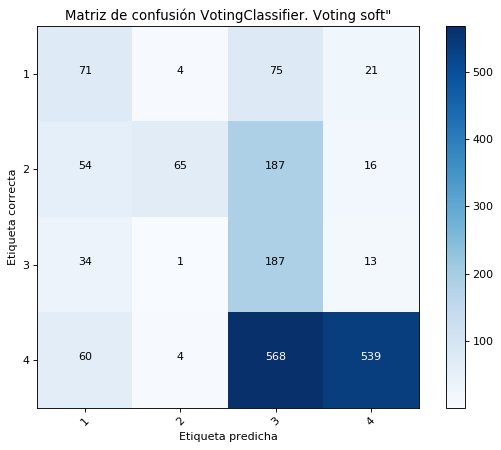


VotingClassifier. voting soft with weights
[4 4 4 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.99
Exactitud del algoritmo para conjunto de validación: 0.75


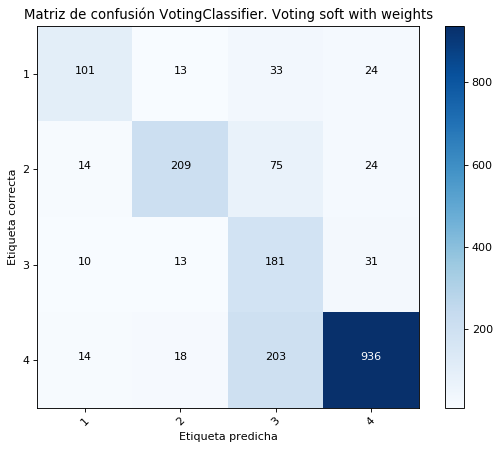

In [138]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=1, max_iter=1000)
clf1.fit(X_train, y_train)
y_pred_train =   clf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf1.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train, y_train)
y_pred_train =   clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf2.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_train =   clf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf3.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
y_pred_train =   eclf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf1.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
save_mlflow("VotingClassifier",eclf1,None,
            None, {"dataset": "individual", "sampling":"smote"},
            accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft', n_jobs=-1)
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
y_pred_train =   eclf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf2.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf2,None,
            None, {"dataset": "individual", "sampling":"smote"},
            accuracy_train, accuracy_test)


print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,3,1],
       flatten_transform=True, n_jobs=-1)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
y_pred_train =   eclf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf3.predict(X_test.drop(['Id','idhogar'], axis=1))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf3,None,
            None, {"dataset": "individual", "sampling":"smote"},
            accuracy_train, accuracy_test)




## IV. Aplicación de Modelos de Clasificación en individuos ADASYN

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [199]:
X_train, X_test, y_train, y_test, columns = prepare_data(clean_ds)
col = X_train.columns.drop(['Id', 'idhogar'])
X_resampled_adasyn_ind, y_resampled_adasyn_ind = ADASYN(
    random_state=42).fit_resample(X_train.drop(['Id', 'idhogar'], axis=1),
                                  y_train)
print(sorted(Counter(y_resampled_adasyn_ind).items()))
X_train = pd.DataFrame(X_resampled_adasyn_ind)
X_train.columns = col
y_train = pd.DataFrame(y_resampled_adasyn_ind)
y_train.columns = pd.Index(['Target'])
X_test = X_test.drop(['Id', 'idhogar'], axis=1)

[(1, 4838), (2, 4669), (3, 4734), (4, 4787)]


In [198]:
X_train, X_test, y_train, y_test, columns = prepare_data(clean_ds)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
export_csv = pd.concat([train, test]).to_csv (r'clean_adasyn_dataframe.csv', index = None, header=True) 

### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [146]:
# Algunos kernels son: "rbf","sigmoid","poly"
from sklearn.svm import SVC
model = SVC(kernel="sigmoid", random_state=0, class_weight=None, gamma='auto')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.49
Exactitud del algoritmo para conjunto de validación: 0.50
              precision    recall  f1-score   support

           1       0.21      0.52      0.30       160
           2       0.32      0.31      0.32       319
           3       0.19      0.35      0.25       236
           4       0.89      0.58      0.70      1184

    accuracy                           0.50      1899
   macro avg       0.40      0.44      0.39      1899
weighted avg       0.65      0.50      0.55      1899


Accuracy: 0.5013



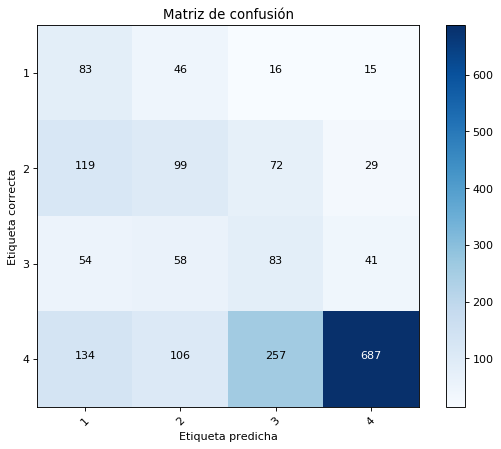

In [147]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

report = classification_report(y_test, y_pred_test)

save_mlflow("SVC",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "individual", "sampling":"adasyn"},
           accuracy_train, accuracy_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [148]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.88
              precision    recall  f1-score   support

           1       0.84      0.81      0.83       160
           2       0.79      0.83      0.81       319
           3       0.79      0.77      0.78       236
           4       0.93      0.93      0.93      1184

    accuracy                           0.88      1899
   macro avg       0.84      0.83      0.84      1899
weighted avg       0.88      0.88      0.88      1899


Accuracy: 0.8810



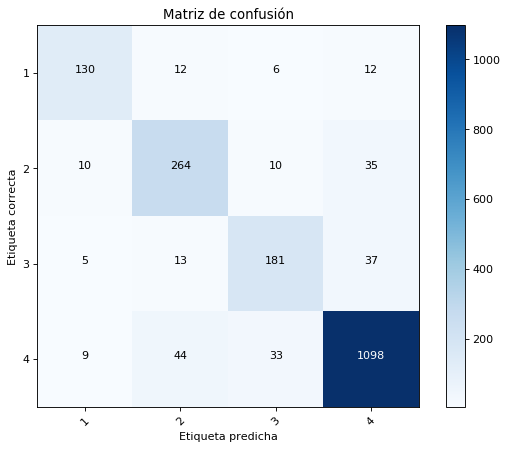

In [149]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("RandomForestClassifier",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "individual", "sampling":"adasyn"},
           accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

#### 2. Random Forest Param tunning

Mejor conjunto de parámetros:
{'max_features': 9, 'min_samples_leaf': 10, 'n_estimators': 500}


Puntajes de la grilla:


Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           1       0.65      0.78      0.71       155
           2       0.61      0.71      0.65       323
           3       0.68      0.60      0.63       255
           4       0.88      0.83      0.85      1166

    accuracy                           0.78      1899
   macro avg       0.70      0.73      0.71      1899
weighted avg       0.78      0.78      0.78      1899


Exactitud del algoritmo para conjunto de entrenamiento: 0.97
Exactitud del algoritmo para conjunto de validación: 0.78



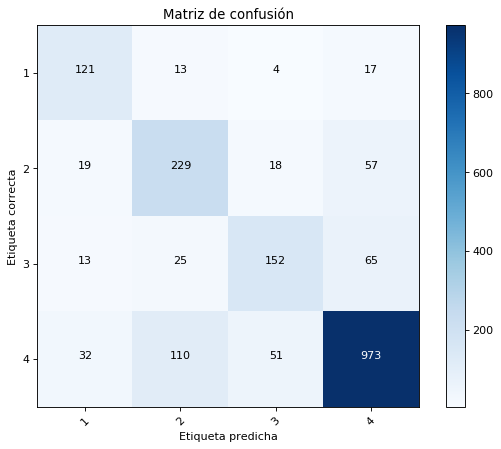

In [213]:
exploring_params = {
    'max_features': np.arange(5, 10),
    'n_estimators': [500],
    'min_samples_leaf': [10, 50, 100, 200, 500]
}

m = RandomForestClassifier(random_state=2)
n_cross_val = 5
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, n_jobs=-1)

model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print()
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print()
print(
    "Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):",
    end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print("================================================", end="\n\n")
save_mlflow("RandomForestClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.best_params_, {
                "dataset": "individual",
                "sampling": "adasyn"
            }, accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [150]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.59
Exactitud del algoritmo para conjunto de validación: 0.50
              precision    recall  f1-score   support

           1       0.36      0.58      0.44       160
           2       0.28      0.38      0.32       319
           3       0.17      0.32      0.23       236
           4       0.85      0.55      0.67      1184

    accuracy                           0.50      1899
   macro avg       0.42      0.46      0.41      1899
weighted avg       0.63      0.50      0.54      1899


Accuracy: 0.4961



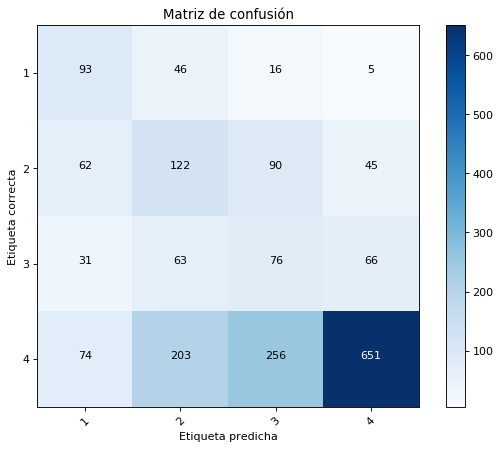

In [151]:
y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("MLPClassifier",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "individual", "sampling":"adasyn"},
           accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.53
Exactitud del algoritmo para conjunto de validación: 0.49

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.93

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.34
Exactitud del algoritmo para conjunto de validación: 0.25

VotingClassifier. voting hard
[3 2 1 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.75
Exactitud del algoritmo para conjunto de validación: 0.56


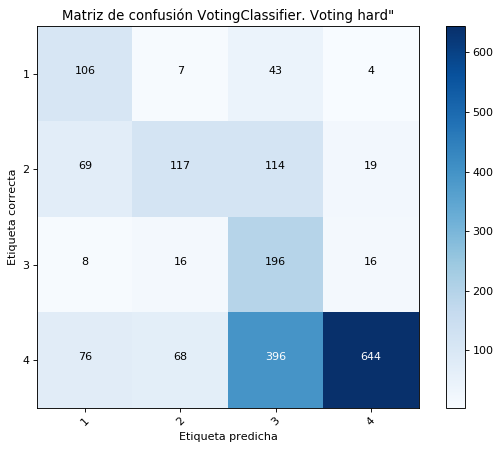


VotingClassifier. voting soft
[3 2 1 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.66
Exactitud del algoritmo para conjunto de validación: 0.40


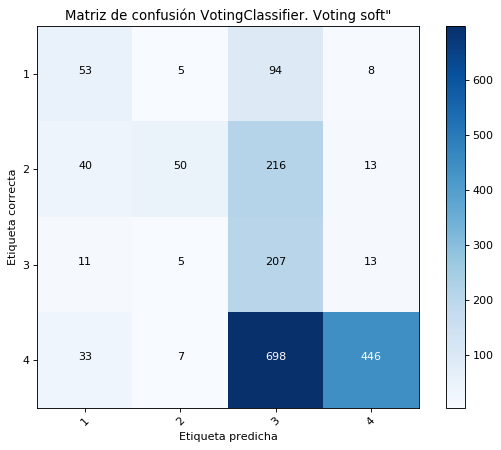


VotingClassifier. voting soft with weights
[3 2 1 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.99
Exactitud del algoritmo para conjunto de validación: 0.75


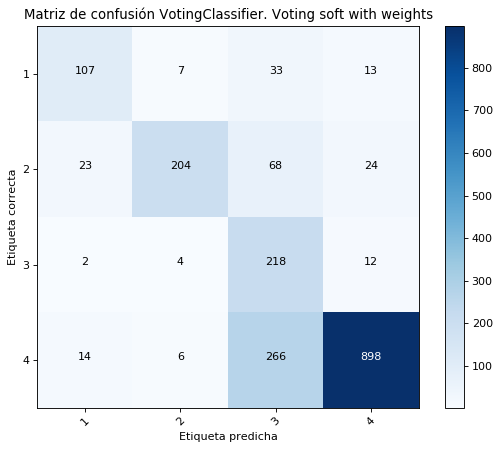

In [152]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',
                          random_state=1, max_iter=1000)
clf1.fit(X_train, y_train)
y_pred_train =   clf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train, y_train)
y_pred_train =   clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_train =   clf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   clf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
y_pred_train =   eclf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
save_mlflow("VotingClassifier",eclf1,None,
            None, {"dataset": "individual", "sampling":"adasyn"},
            accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft', n_jobs=-1)
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
y_pred_train =   eclf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf2,None,
            None, {"dataset": "individual", "sampling":"adasyn"},
            accuracy_train, accuracy_test)


print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,3,1],
       flatten_transform=True, n_jobs=-1)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
y_pred_train =   eclf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)
y_pred_test =   eclf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier",eclf3,None,
            None, {"dataset": "individual", "sampling":"adasyn"},
            accuracy_train, accuracy_test)



## V. Aplicación de Modelos de Clasificación en Jefes de Hogar Random Oversampled

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [159]:
X_train, X_test, y_train, y_test, columns = prepare_data(
    clean_ds[clean_ds['parentesco1'] == 1])
ros = RandomOverSampler(random_state=0)
X_resampled_random_jef, y_resampled_random_jef = ros.fit_resample(
    X_train, y_train)
print(sorted(Counter(y_resampled_random_jef).items()))
X_train = pd.DataFrame(X_resampled_random_jef)
X_train.columns = columns.drop('Target')
X_train = X_train.drop(['Id', 'idhogar'], axis=1)
y_train = pd.DataFrame(y_resampled_random_jef)
y_train.columns = ['Target']
X_test = X_test.drop(['Id', 'idhogar'], axis=1)

[(1, 1540), (2, 1540), (3, 1540), (4, 1540)]


### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [160]:
# Algunos kernels son: "rbf","sigmoid","poly"

model = SVC(kernel="sigmoid", random_state=0, class_weight=None)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.49
Exactitud del algoritmo para conjunto de validación: 0.50
              precision    recall  f1-score   support

           1       0.17      0.37      0.24        41
           2       0.29      0.31      0.30        81
           3       0.16      0.38      0.22        69
           4       0.91      0.58      0.71       402

    accuracy                           0.50       593
   macro avg       0.38      0.41      0.37       593
weighted avg       0.69      0.50      0.56       593


Accuracy: 0.5025



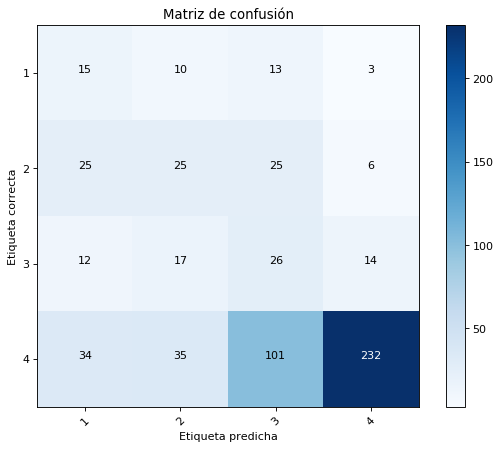

In [161]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)
save_mlflow("SVC",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "jefe de hogar", "sampling":"random"},
           accuracy_train, accuracy_test)
report = classification_report(y_test, y_pred_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [162]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.60
              precision    recall  f1-score   support

           1       0.28      0.29      0.29        41
           2       0.26      0.36      0.30        81
           3       0.18      0.14      0.16        69
           4       0.80      0.76      0.78       402

    accuracy                           0.60       593
   macro avg       0.38      0.39      0.38       593
weighted avg       0.62      0.60      0.61       593


Accuracy: 0.6037



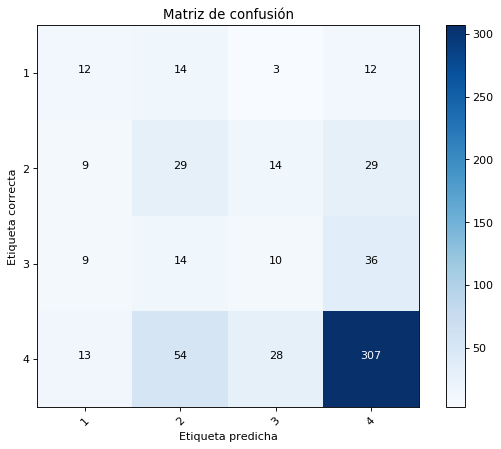

In [163]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

save_mlflow("RandomForestClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "jefe de hogar",
                "sampling": "random"
            }, accuracy_train, accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [167]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.46
Exactitud del algoritmo para conjunto de validación: 0.51
              precision    recall  f1-score   support

           1       0.23      0.49      0.31        41
           2       0.27      0.25      0.26        81
           3       0.18      0.43      0.25        69
           4       0.88      0.58      0.70       402

    accuracy                           0.51       593
   macro avg       0.39      0.44      0.38       593
weighted avg       0.67      0.51      0.56       593


Accuracy: 0.5110



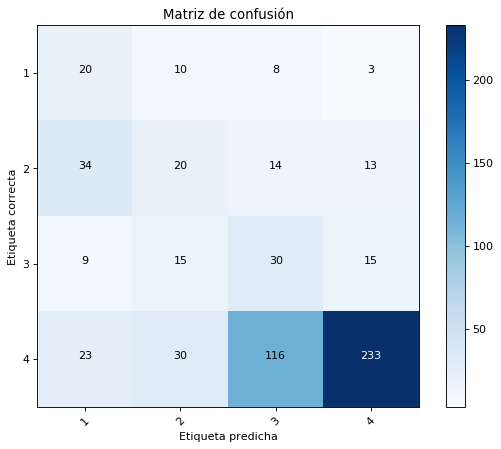

In [168]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

save_mlflow("MLPClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "jefe de hogar",
                "sampling": "random"
            }, accuracy_train, accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test),
                      classes=[1, 2, 3, 4],
                      title='Matriz de confusión')
plt.autoscale()
plt.show()

Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

In [ ]:
# Se calcula la exactitud para ambos conjuntos, train y test:



### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.53
Exactitud del algoritmo para conjunto de validación: 0.50

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.69

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.33
Exactitud del algoritmo para conjunto de validación: 0.27

VotingClassifier. voting hard
[2 3 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.74
Exactitud del algoritmo para conjunto de validación: 0.51


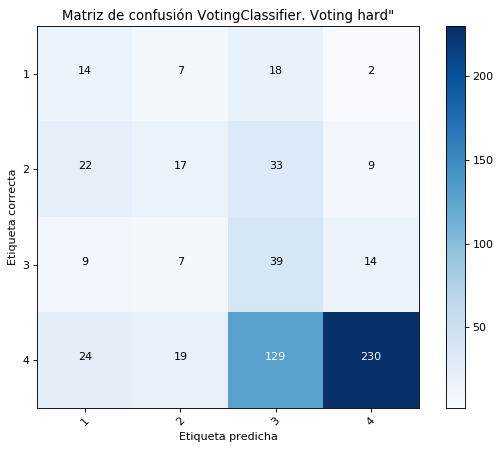


VotingClassifier. voting soft
[2 3 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.70
Exactitud del algoritmo para conjunto de validación: 0.39


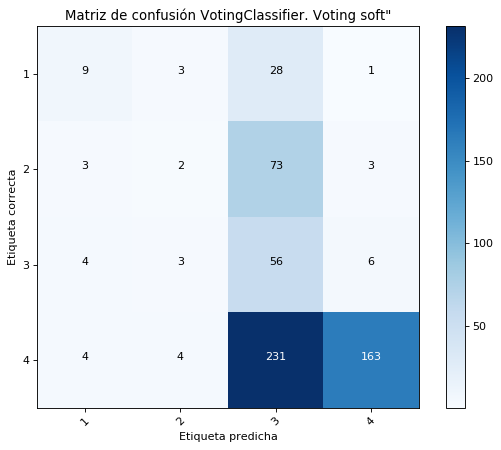


VotingClassifier. voting soft with weights
[2 4 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.56


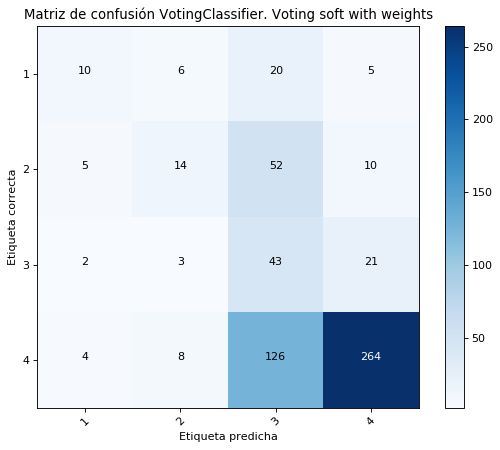

In [166]:
clf1 = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial',
                          random_state=1,
                          max_iter=1000)
clf1.fit(X_train, y_train)
y_pred_train = clf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_train = clf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='hard',
                         n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
y_pred_train = eclf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("VotingClassifier", eclf1, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "random"
}, accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         n_jobs=-1)
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
y_pred_train = eclf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf2, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "random"
}, accuracy_train, accuracy_test)

print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         weights=[2, 3, 1],
                         flatten_transform=True,
                         n_jobs=-1)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
y_pred_train = eclf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf3, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "random"
}, accuracy_train, accuracy_test)

## III. Aplicación de Modelos de Clasificación en Jefes de Hogar SMOTE 

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [169]:
X_train, X_test, y_train, y_test, columns = prepare_data(
    clean_ds[clean_ds['parentesco1'] == 1])

X_resampled_smote_ind, y_resampled_smote_ind = SMOTE(
    random_state=42).fit_resample(X_train.drop(['Id', 'idhogar'], axis=1),
                                  y_train)
print(sorted(Counter(y_resampled_smote_ind).items()))
X_train = pd.DataFrame(X_resampled_smote_ind)
X_train.columns = X_train.columns
y_train = pd.DataFrame(y_resampled_smote_ind)
y_train.columns = pd.Index(['Target'])
X_test = X_test.drop(['Id', 'idhogar'], axis=1)

[(1, 1554), (2, 1554), (3, 1554), (4, 1554)]


### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [170]:
# Algunos kernels son: "rbf","sigmoid","poly"
from sklearn.svm import SVC
model = SVC(kernel="sigmoid", random_state=0, class_weight=None, gamma='auto')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.50
Exactitud del algoritmo para conjunto de validación: 0.53
              precision    recall  f1-score   support

           1       0.20      0.27      0.23        49
           2       0.27      0.37      0.31        89
           3       0.19      0.40      0.26        67
           4       0.91      0.62      0.74       388

    accuracy                           0.53       593
   macro avg       0.39      0.42      0.39       593
weighted avg       0.67      0.53      0.58       593


Accuracy: 0.5312



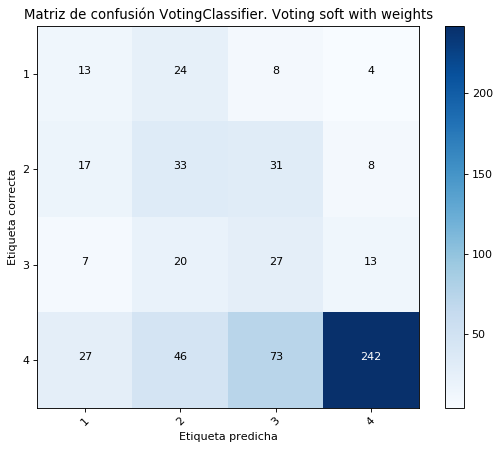

In [171]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

report = classification_report(y_test, y_pred_test)

save_mlflow("SVC",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(),{"dataset": "jefe de hogar", "sampling":"smote"},
           accuracy_train, accuracy_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()


### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [172]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.55
              precision    recall  f1-score   support

           1       0.14      0.16      0.15        49
           2       0.24      0.30      0.27        89
           3       0.18      0.19      0.19        67
           4       0.80      0.72      0.76       388

    accuracy                           0.55       593
   macro avg       0.34      0.35      0.34       593
weighted avg       0.59      0.55      0.57       593


Accuracy: 0.5548



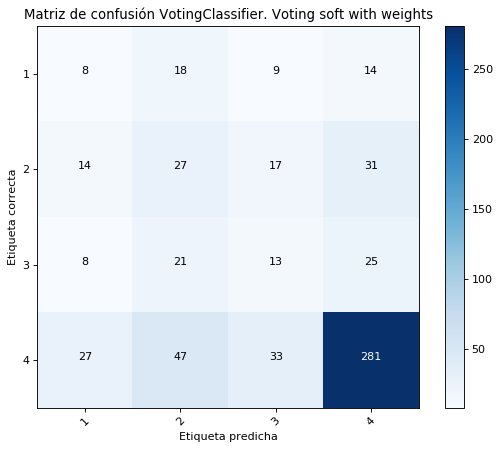

In [173]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("RandomForestClassifier",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "jefe de hogar", "sampling":"smote"},
           accuracy_train, accuracy_test)


plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [174]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.60
Exactitud del algoritmo para conjunto de validación: 0.49
              precision    recall  f1-score   support

           1       0.17      0.08      0.11        49
           2       0.20      0.22      0.21        89
           3       0.10      0.18      0.13        67
           4       0.72      0.65      0.68       388

    accuracy                           0.49       593
   macro avg       0.30      0.28      0.28       593
weighted avg       0.53      0.49      0.50       593


Accuracy: 0.4857



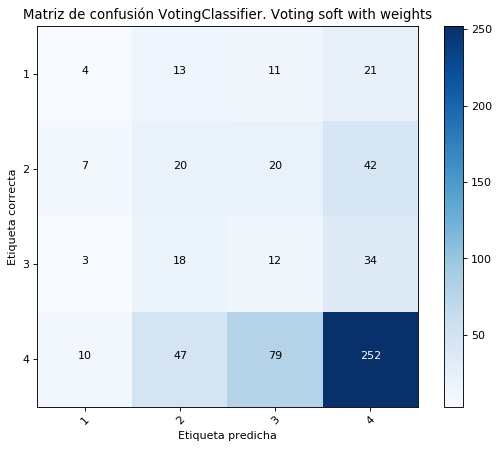

In [175]:
y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("MLPClassifier",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "jefe de hogar", "sampling":"smote"},
           accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()

Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

In [ ]:
# Se calcula la exactitud para ambos conjuntos, train y test:



### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.57
Exactitud del algoritmo para conjunto de validación: 0.58

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.65

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.33
Exactitud del algoritmo para conjunto de validación: 0.31

VotingClassifier. voting hard
[4 1 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.77
Exactitud del algoritmo para conjunto de validación: 0.58


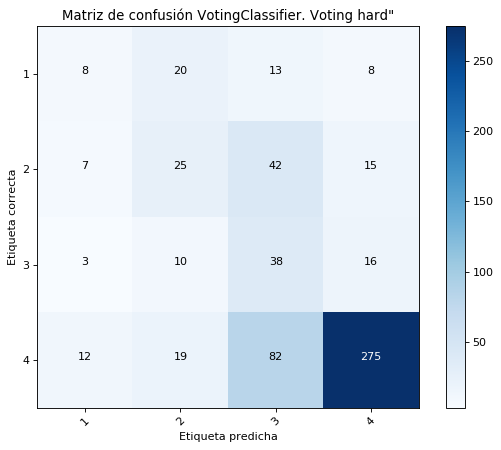


VotingClassifier. voting soft
[4 2 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.65
Exactitud del algoritmo para conjunto de validación: 0.42


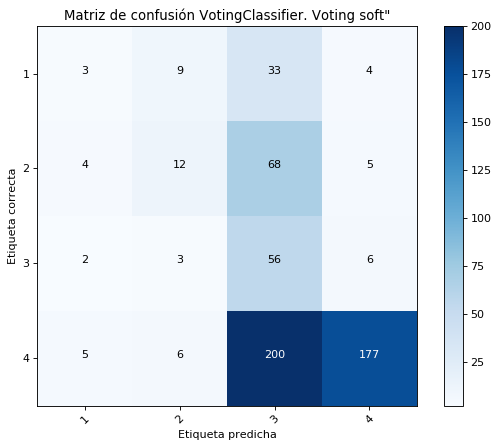


VotingClassifier. voting soft with weights
[4 2 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.99
Exactitud del algoritmo para conjunto de validación: 0.56


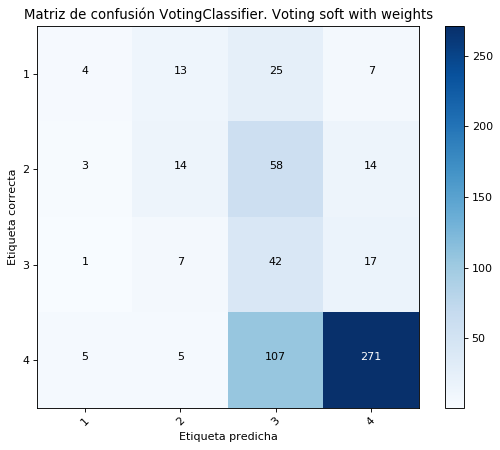

In [176]:
clf1 = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial',
                          random_state=1,
                          max_iter=1000)
clf1.fit(X_train, y_train)
y_pred_train = clf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_train = clf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='hard',
                         n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
y_pred_train = eclf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("VotingClassifier", eclf1, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "smote"
}, accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         n_jobs=-1)
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
y_pred_train = eclf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf2, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "smote"
}, accuracy_train, accuracy_test)

print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         weights=[2, 3, 1],
                         flatten_transform=True,
                         n_jobs=-1)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
y_pred_train = eclf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf3, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "smote"
}, accuracy_train, accuracy_test)



## IV. Aplicación de Modelos de Clasificación en Jefe de Hogar ADASYN

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

In [177]:
X_train, X_test, y_train, y_test, columns = prepare_data(
    clean_ds[clean_ds['parentesco1'] == 1])

X_resampled_adasyn_jef, y_resampled_adasyn_jef = ADASYN(
    random_state=42).fit_resample(X_train.drop(['Id', 'idhogar'], axis=1),
                                  y_train)
print(sorted(Counter(y_resampled_adasyn_jef).items()))
X_train = pd.DataFrame(X_resampled_smote_ind)
X_train.columns = X_train.columns
y_train = pd.DataFrame(y_resampled_smote_ind)
y_train.columns = pd.Index(['Target'])
X_test = X_test.drop(['Id', 'idhogar'], axis=1)

[(1, 1538), (2, 1461), (3, 1499), (4, 1551)]


### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [178]:
# Algunos kernels son: "rbf","sigmoid","poly"
from sklearn.svm import SVC
model = SVC(kernel="sigmoid", random_state=0, class_weight=None, gamma='auto')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.50
Exactitud del algoritmo para conjunto de validación: 0.55
              precision    recall  f1-score   support

           1       0.25      0.47      0.33        45
           2       0.39      0.45      0.42        88
           3       0.18      0.38      0.25        69
           4       0.89      0.61      0.72       391

    accuracy                           0.55       593
   macro avg       0.43      0.48      0.43       593
weighted avg       0.69      0.55      0.59       593


Accuracy: 0.5464



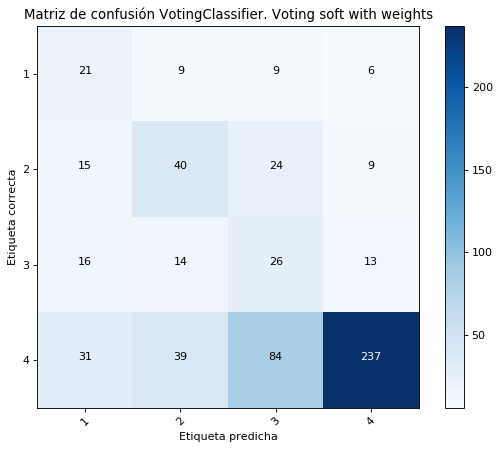

In [179]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

report = classification_report(y_test, y_pred_test)

save_mlflow("SVC",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "jefe de hogar", "sampling":"adasyn"},
           accuracy_train, accuracy_test)

print(report, end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()

### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [180]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.81
              precision    recall  f1-score   support

           1       0.65      0.62      0.64        45
           2       0.62      0.85      0.72        88
           3       0.63      0.61      0.62        69
           4       0.93      0.86      0.89       391

    accuracy                           0.81       593
   macro avg       0.71      0.73      0.72       593
weighted avg       0.82      0.81      0.81       593


Accuracy: 0.8094



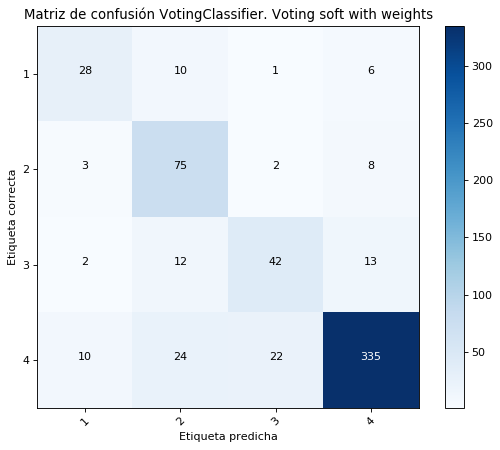

In [181]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("RandomForestClassifier", model,
            classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {
                "dataset": "jefe de hogar",
                "sampling": "adasyn"
            }, accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()

### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [182]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Exactitud del algoritmo para conjunto de entrenamiento: 0.60
Exactitud del algoritmo para conjunto de validación: 0.61
              precision    recall  f1-score   support

           1       0.48      0.36      0.41        45
           2       0.28      0.27      0.28        88
           3       0.22      0.32      0.26        69
           4       0.80      0.77      0.79       391

    accuracy                           0.61       593
   macro avg       0.45      0.43      0.43       593
weighted avg       0.63      0.61      0.62       593


Accuracy: 0.6138



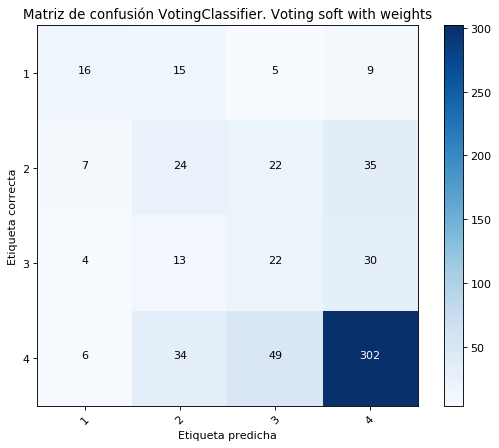

In [183]:
y_pred_train =   model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test =   model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

print(classification_report(y_test, y_pred_test), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_test, y_pred_test))
print("================================================", end="\n\n")

save_mlflow("MLPClassifier",model,classification_report(y_test, y_pred_test, output_dict=True),
            model.get_params(), {"dataset": "jefe de hogar", "sampling":"adasyn"},
           accuracy_train, accuracy_test)

plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()

Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

### 4. Clasificador por Votos


LogisticRegression
Exactitud del algoritmo para conjunto de entrenamiento: 0.57
Exactitud del algoritmo para conjunto de validación: 0.62

RandomForestClassifier
Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.91

GaussianNB
Exactitud del algoritmo para conjunto de entrenamiento: 0.33
Exactitud del algoritmo para conjunto de validación: 0.30

VotingClassifier. voting hard
[4 1 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.77
Exactitud del algoritmo para conjunto de validación: 0.68


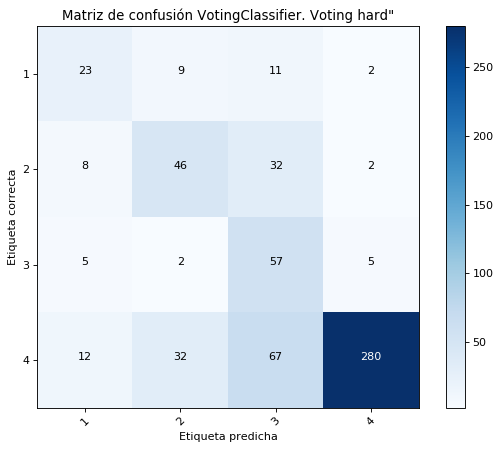


VotingClassifier. voting soft
[4 2 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.65
Exactitud del algoritmo para conjunto de validación: 0.50


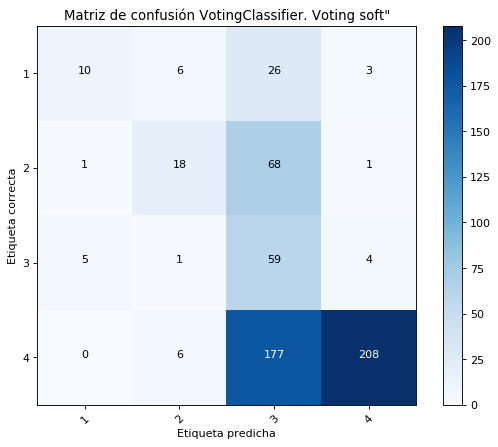


VotingClassifier. voting soft with weights
[4 2 3 ... 3 3 3]
Exactitud del algoritmo para conjunto de entrenamiento: 0.99
Exactitud del algoritmo para conjunto de validación: 0.73


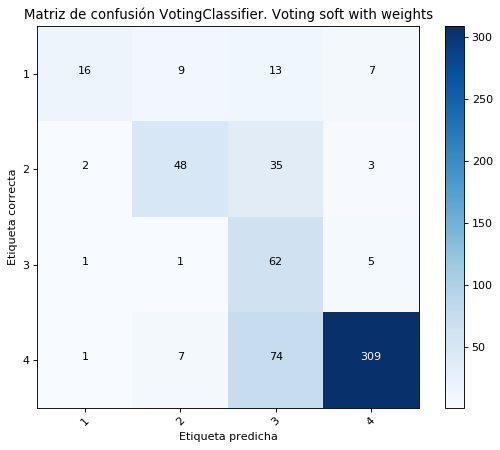

In [184]:
clf1 = LogisticRegression(solver='lbfgs',
                          multi_class='multinomial',
                          random_state=1,
                          max_iter=1000)
clf1.fit(X_train, y_train)
y_pred_train = clf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("")
print("LogisticRegression")
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("RandomForestClassifier")
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf2.fit(X_train, y_train)
y_pred_train = clf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
print("")
print("GaussianNB")
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_train = clf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = clf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)

print("")
print("VotingClassifier. voting hard")
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='hard',
                         n_jobs=-1)
eclf1 = eclf1.fit(X_train, y_train)
print(eclf1.predict(X_train))
y_pred_train = eclf1.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf1.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
save_mlflow("VotingClassifier", eclf1, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "adasyn"
}, accuracy_train, accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting hard"')
plt.autoscale()
plt.show()

np.array_equal(eclf1.named_estimators_.lr.predict(X_train),
               eclf1.named_estimators_['lr'].predict(X_train))
print("")
print("VotingClassifier. voting soft")
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         n_jobs=-1)
eclf2 = eclf2.fit(X_train, y_train)
print(eclf2.predict(X_train))
y_pred_train = eclf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf2.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft"')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf2, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "adasyn"
}, accuracy_train, accuracy_test)

print("")
print("VotingClassifier. voting soft with weights")
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),
                                     ('gnb', clf3)],
                         voting='soft',
                         weights=[2, 3, 1],
                         flatten_transform=True,
                         n_jobs=-1)
eclf3 = eclf3.fit(X_train, y_train)
print(eclf3.predict(X_train))
y_pred_train = eclf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" %
      accuracy_train)
y_pred_test = eclf3.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Exactitud del algoritmo para conjunto de validación: %.2f" %
      accuracy_test)
plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_test),
    classes=[1, 2, 3, 4],
    title='Matriz de confusión VotingClassifier. Voting soft with weights')
plt.autoscale()
plt.show()
save_mlflow("VotingClassifier", eclf3, None, None, {
    "dataset": "jefe de hogar",
    "sampling": "adasyn"
}, accuracy_train, accuracy_test)





### 5. Selección del Modelo

#### 5.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

#### 5.2. Selección de Regularizador

 ¿Utilizaron algún regularizador?¿Cuál?

#### 5.3. Selección de Función de Costo

¿Cuál fue la función de costo utilizada?

#### 5.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

### 6. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar GridSearch. Además, deben calcular las métricas solicitadas.

In [ ]:
# Para la búsqueda de los mejores parámetros, por ejemplo de logistic regression, pueden usar:

exploring_params = {
        'params': [], # Lista de parámetros a explorar
        }

model = # Especificar modelo
n_cross_val =   # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)
    model.fit(X_train, y_train)
    
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print()
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score'])
print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")

In [ ]:
# Las métricas solicitadas son: accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### Extras
